In [40]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import os
import scipy.integrate as spi
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint, solve_ivp
from scipy.interpolate import interp1d 
import time 
from project_lib import * 

In [ ]:

def rossler(cord, t, a=0.2, b=0.2, c=5.7):
    x, y, z = cord
    return [-y - z, x + a*y, b + z*(x - c)]

def rossler_ivp(t, cord, a=0.2, b=0.2, c=5.7):
    x, y, z = cord
    return [-y - z, x + a*y, b + z*(x - c)]


Method     Time (s)   Order      Type                 Adaptive  
------------------------------------------------------------
Euler      0.8051     1          Explicit             False     
RK2        2.5987     2          Explicit             False     
RK4        1.8737     4          Explicit             False     
odeint     0.0353     Variable   Automatic            True      
RK45       0.1034     4-5        Explicit Adaptive    True      
DOP853     0.2120     8          Explicit Adaptive    True      


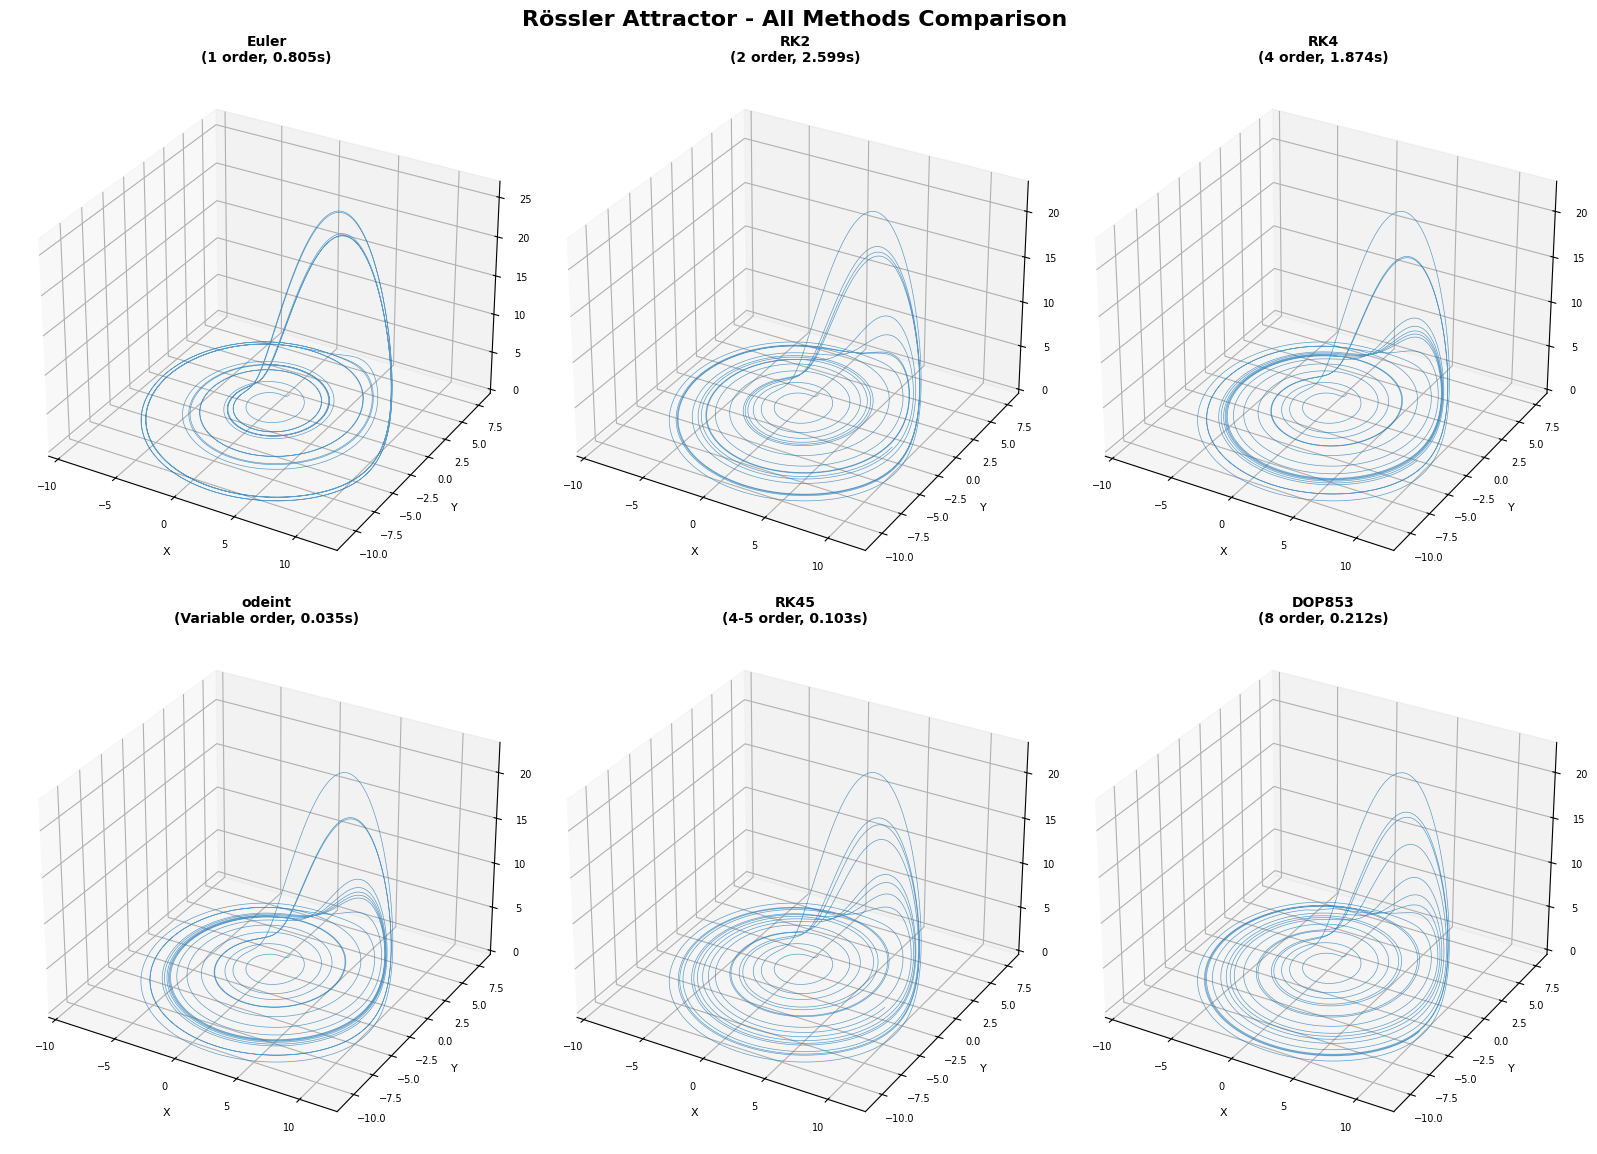

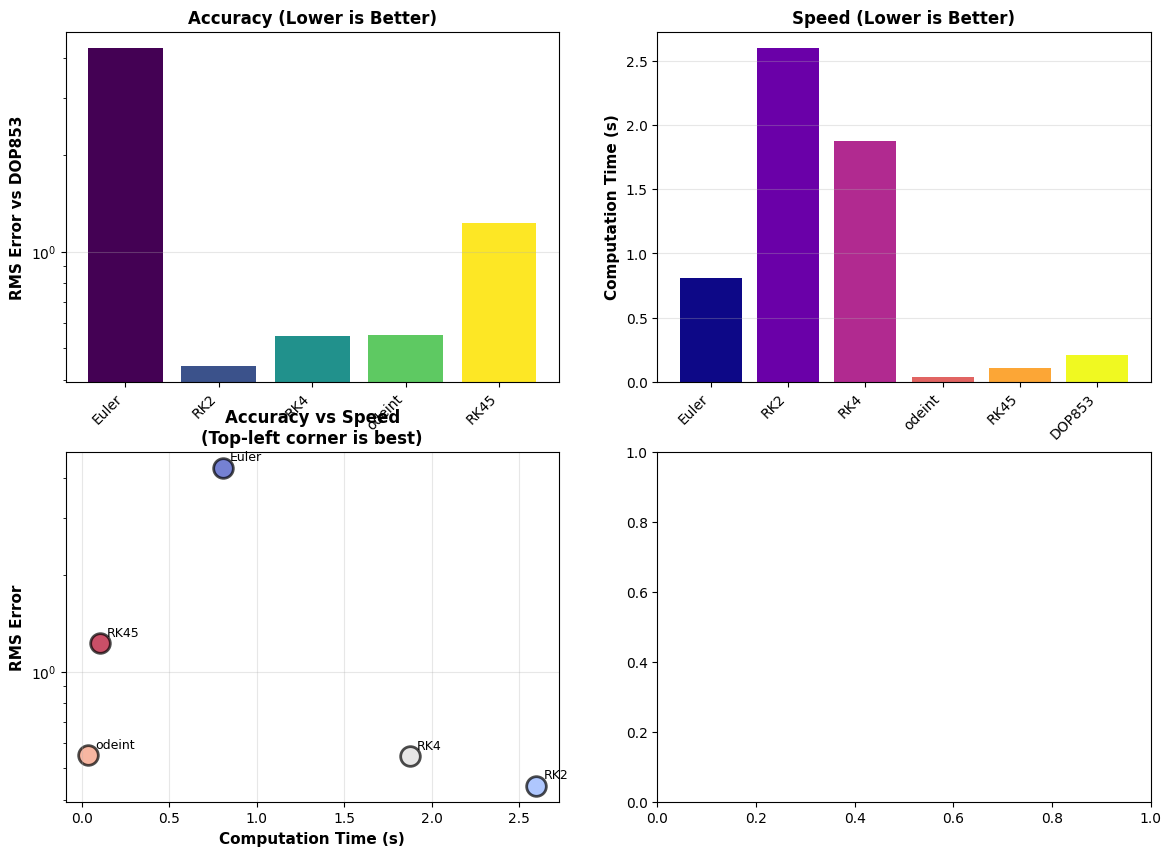

In [ ]:
#  comparision of six numerical methods (fixed vs adaptive step size)

def euler_method(f, y0, t, args=()):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        dt = t[i+1] - t[i]
        y[i+1] = y[i] + dt * np.array(f(y[i], t[i], *args))
    return y

def rk2_method(f, y0, t, args=()):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        dt = t[i+1] - t[i]
        k1 = np.array(f(y[i], t[i], *args))
        k2 = np.array(f(y[i] + dt/2*k1, t[i] + dt/2, *args))
        y[i+1] = y[i] + dt * k2
    return y

def rk4_method(f, y0, t, args=()):
    y = np.zeros((len(t), len(y0))) 
    y[0] = y0
    for i in range(len(t) - 1):
        dt = t[i+1] - t[i]
        k1 = np.array(f(y[i], t[i], *args))
        k2 = np.array(f(y[i] + dt/2*k1, t[i] + dt/2, *args))
        k3 = np.array(f(y[i] + dt/2*k2, t[i] + dt/2, *args))
        k4 = np.array(f(y[i] + dt*k3, t[i] + dt, *args))
        y[i+1] = y[i] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

def compare_all_methods(y0, t_span, dt=0.01):
    t_eval = np.arange(t_span[0], t_span[1], dt) # equally spaced array
    results = {}
    
   # Euler method
    start = time.time()
    sol_euler = euler_method(rossler, y0, t_eval, args=(0.2, 0.2, 5.7))
    t_euler = time.time() - start
    results['Euler'] = {
        'solution': sol_euler,
        'time': t_euler,
        'order': 1,
        'type': 'Explicit',
        'adaptive': False
    }
    
    # RK2 method
    start = time.time()
    sol_rk2 = rk2_method(rossler, y0, t_eval, args=(0.2, 0.2, 5.7))
    t_rk2 = time.time() - start
    results['RK2'] = {
        'solution': sol_rk2,
        'time': t_rk2,
        'order': 2,
        'type': 'Explicit',
        'adaptive': False
    }
        
    # RK4 method
    start = time.time()
    sol_rk4 = rk4_method(rossler, y0, t_eval, args=(0.2, 0.2, 5.7))
    t_rk4 = time.time() - start
    results['RK4'] = {
        'solution': sol_rk4,
            'time': t_rk4,
            'order': 4,
            'type': 'Explicit',
            'adaptive': False
        }

    # ODEINT (LSODA) method
    start = time.time()
    sol_odeint = odeint(rossler, y0, t_eval, args=(0.2, 0.2, 5.7))
    t_odeint = time.time() - start
    results['odeint'] = {
        'solution': sol_odeint,
        'time': t_odeint,
        'order': 'Variable',
            'type': 'Automatic',
            'adaptive': True
        }

    # RK45 method
    start = time.time()
    sol_rk45 = solve_ivp(rossler_ivp, t_span, y0, method='RK45', t_eval=t_eval, args=(0.2, 0.2, 5.7))
    t_rk45 = time.time() - start
    results['RK45'] = {
        'solution': sol_rk45.y.T,
            'time': t_rk45,
            'order': '4-5',
            'type': 'Explicit Adaptive',
            'adaptive': True
        }
    
    # DOP853 method
    start = time.time()
    sol_dop853 = solve_ivp(rossler_ivp, t_span, y0, method='DOP853', 
                          t_eval=t_eval, args=(0.2, 0.2, 5.7))
    t_dop853 = time.time() - start
    results['DOP853'] = {
        'solution': sol_dop853.y.T,
        'time': t_dop853,
        'order': 8,
        'type': 'Explicit Adaptive',
        'adaptive': True
    }    
    return results, t_eval

def print_summary_table(results):
    print(f"{'Method':<10} {'Time (s)':<10} {'Order':<10} {'Type':<20} {'Adaptive':<10}")
    print("-" * 60)
    for method, data in results.items():
        print(f"{method:<10} {data['time']:<10.4f} {data['order']:<10} {data['type']:<20} {str(data['adaptive']):<10}")


if __name__ == "__main__":
    # Parameters
    y0 = [1.0, 1.0, 1.0]
    t_span = [0, 100]
    dt = 0.01

    results, t_eval = compare_all_methods(y0, t_span, dt)
    print_summary_table(results)
    plot_all_trajectories(results, t_eval)
    plot_accuracy_comparison(results)
    